In [1]:
import pickle
from utils import *
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

/opt/conda/envs/klue/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)

In [3]:
with open('dict_num_to_label.pkl', 'rb') as f:
    dict_num_to_label = pickle.load(f)

In [4]:
def label_to_num(label):
  num_label = []
  with open('dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [5]:
train_dataset = load_data("./dataset/train/alternate_train.csv")
train_label = label_to_num(train_dataset['label'].values)

In [13]:
span = train_dataset['subject_span'][0]
print(train_dataset['sentence'][0][span[0]:span[1]+1])

비틀즈


In [14]:
train_dataset['sentence'][0]

'〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.'

In [6]:
counter = [0 for _ in range(110)]
for sentence in train_dataset['sentence']:
    words = sentence.split(' ')
    words = [word for word in words if word != ""]
    counter[len(words)] += 1
print(counter)
print(sum(counter[21:]))

[0, 0, 0, 12, 46, 121, 292, 533, 696, 876, 1264, 1325, 1503, 1585, 1667, 1613, 1613, 1576, 1651, 1437, 1364, 1311, 1174, 1091, 999, 881, 750, 692, 636, 576, 491, 498, 409, 400, 352, 285, 277, 227, 213, 172, 175, 162, 150, 106, 103, 101, 105, 89, 83, 61, 65, 43, 50, 54, 43, 41, 35, 38, 29, 14, 22, 21, 23, 11, 15, 14, 17, 12, 8, 19, 4, 9, 12, 3, 7, 4, 8, 5, 2, 4, 3, 9, 2, 3, 7, 2, 5, 2, 2, 0, 0, 2, 2, 3, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
13249


In [11]:
print(RE_train_dataset[7]['input_ids'][:60])
print(RE_train_dataset[7]['entity_ids'][:60])

tensor([    0, 32002, 12365,  2168, 32003,    12,   393,     3,     3,    16,
        32008, 20533,  2440,    24,  2429,  4346,  2210, 32009,    12, 21553,
           23,  2429,  3630,  2210,    13,    12, 21553,    23,  2429,  3630,
         2210,    13,    97,  4877,  2440,  3718,  2429,    24,  2210,    13,
          793,  3671, 27135,  7607,  4892,  2079, 10167,  6233,  6141,  6941,
         3873,    16, 11114,  8219,   886,  2069, 10335,  2371,  2062,    18])
tensor([0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
from collections import Counter
counter = Counter()
for tokenized_sentence in tokenized_train.input_ids:
    counter.update(tokenized_sentence.numpy())

In [ ]:
print(counter)

토큰화된 학습 문장 최대 길이 : 235
토큰화된 학습 문장의 평균 길이 : 56.90757622420696
32470


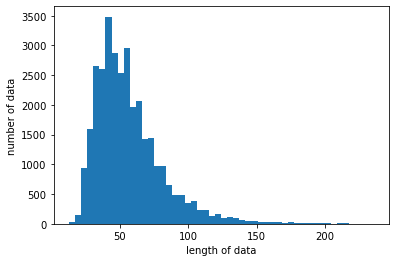

In [ ]:
#토큰화된 학습 문장의 길이조사
print('토큰화된 학습 문장 최대 길이 :',max(sum(l).numpy() for l in tokenized_train.attention_mask))
print('토큰화된 학습 문장의 평균 길이 :',sum(sum(l).numpy() for l in tokenized_train.attention_mask)/len(tokenized_train.attention_mask))
print(len(tokenized_train.attention_mask))
values = [int(sum(l).numpy()) for l in tokenized_train.attention_mask]
plt.hist(values, bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [ ]:
# train 데이터셋에서 UNK 토큰이 있나 확인함(0.3317%)
print(f"총 문장 개수 : {len(tokenized_train.input_ids)}")
cnt = sum(sum((tokenized_train.input_ids == 3))).numpy()
total_words = sum(sum(tokenized_train.attention_mask)).numpy()

print(f"[UNK] 토큰 개수 : {cnt}")
print(f"전체 토큰 개수(PAD제외) : {total_words}")
print(f"[UNK] 비율 : {cnt / total_words * 100}%")

총 문장 개수 : 32470
[UNK] 토큰 개수 : 6315
전체 토큰 개수(PAD제외) : 1847789
[UNK] 비율 : 0.34175980049670174%


In [ ]:
test_dataset = load_data("./dataset/test/alternate_test.csv")
tokenized_test = tokenized_dataset(test_dataset, tokenizer)

In [ ]:
train_dataset['label'].values

array(['no_relation', 'no_relation', 'org:member_of', ...,
       'org:top_members/employees', 'no_relation',
       'org:top_members/employees'], dtype=object)

In [ ]:
tokenizer.decode(tokenized_test.input_ids[0], skip_special_tokens=True)

"지난 15일 MBC'탐사기획 스트레이트'가 이 사실을 보도했다."

In [ ]:
test_dataset.label[0]

100

In [ ]:
print(test_dataset[:10])

   id                                           sentence subject_entity  \
0   0               지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.            MBC   
1   1  사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...        프린세스 프링   
2   2  한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...             경찰   
3   3  정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...             세조   
4   4  당시 민주당 이진련 시의원은 권영진 시장에게 "긴급 생계자금을 왜 현금으로 지원하지...            민주당   
5   5  미국은 필리핀 측에서는 동맹이 아니라 지배자가 되었다고 볼 수 있기 때문에, 필리핀...            필리핀   
6   6  한국당 전희경 대변인은 이날 정 총리 후보자 지명 직후 논평을 내고 "의회를 시녀화...            전희경   
7   7  문재인 대통령 부인 김정숙 여사는 22일부터 1박2일 일정으로 광주를 방문해 경기를...            문재인   
8   8  조선민주주의인민공화국 관할 지역은 개풍군 영북면 월고리 및 연천군 서남면 지역을 합...    조선민주주의인민공화국   
9   9         소련군에서 그의 이름도 중국식의 진지첸으로 조선인으로서의 정체성도 희박했다.            소련군   

  object_entity subject_span object_span  label  
0    탐사기획 스트레이트       (7, 9)    (12, 21)    100  
1            공주      (7, 13)    (84, 85)    100  
2         1995년   (121, 

토큰화된 테스트 문장 최대 길이 : 227
토큰화된 테스트 문장의 평균 길이 : 55.15054732775274
7765


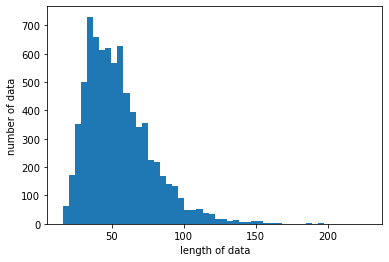

In [ ]:
#토큰화된 테스트 문장의 길이조사
print('토큰화된 테스트 문장 최대 길이 :',max(sum(l).numpy() for l in tokenized_test.attention_mask))
print('토큰화된 테스트 문장의 평균 길이 :',sum(sum(l).numpy() for l in tokenized_test.attention_mask)/len(tokenized_test.attention_mask))
print(len(tokenized_test.attention_mask))
values = [int(sum(l).numpy()) for l in tokenized_test.attention_mask]
plt.hist(values, bins=50)
plt.xlabel('length of data')
plt.ylabel('number of data')
plt.show()

In [ ]:
# test 데이터셋에서 UNK 토큰이 있나 확인함(0.2202%)
print(f"총 문장 개수 : {len(tokenized_test.input_ids)}")
cnt = sum(sum((tokenized_test.input_ids == 3))).numpy()
total_words = sum(sum(tokenized_test.attention_mask)).numpy()

print(f"[UNK] 토큰 개수 : {cnt}")
print(f"전체 토큰 개수(PAD제외) : {total_words}")
print(f"[UNK] 비율 : {(cnt / total_words) * 100}%")

총 문장 개수 : 7765
[UNK] 토큰 개수 : 925
전체 토큰 개수(PAD제외) : 428244
[UNK] 비율 : 0.21599835607737644%


In [ ]:
문장에서 1번만 나온 단어는 지워버릴수 있음!!!
데이터 전처리를 다시 한번 확인해봐야함, 토크나이저
loss의 의미 KL Divergence 이해(면접단골)
yaml 사용해보기

In [ ]:
text = "[SUBJ]이순신[/SUBJ]은 조선 중기의 [OBJ]무신[/OBJ]이다."
tokenized_text = tokenizer.tokenize(text, add_special_tokens=True)

In [ ]:
print(tokenized_text)

In [ ]:
input_ids = tokenizer.encode(text, add_special_tokens=True)

In [ ]:
print(input_ids)

In [ ]:
decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids)
decoded_ids = tokenizer.decode(input_ids,skip_special_tokens=True)
print(decoded_ids)

In [6]:
test_dataset = load_data('./dataset/test/alternate_test.csv')

In [11]:
test_dataset.loc[test_dataset['subject_tag'] == 'LOC']

,id,sentence,subject_entity,object_entity,subject_span,object_span,label,subject_tag,object_tag
6820,6820,"1875년 시카고 빈민가에 교회를 설립했는데, 구두판매원출신다운 쉽고 설득력있는 무...",시카고,1875년,"(6, 8)","(0, 4)",100,LOC,DAT


In [6]:
import pickle
with open('augmented.pkl', 'rb') as f:
    augmented_sentences = pickle.load(f)

In [9]:
print(len(augmented_sentences))

14613


In [12]:
print(augmented_sentences[300])

(['FC 인테르나치오날레 밀라노, 유벤투스 FC와 함께 이탈리아를 대표하는 전통 명문 클럽으로, 2009년 현재까지 세리에 A에서 18회 이탈리아에서 유벤투스 FC 많은 리그 우승 기록을 인테르와 동률을 이루고 있다.', 'FC 인테르나치오날레 밀라노, 유벤투스 FC와 함께 이탈리아를 리그 전통 명문 클럽으로, 2009년 현재까지 세리에 A에서 18회 우승하여 이탈리아에서 유벤투스 FC 다음으로 가지고 대표하는 우승 기록을 많은 있고, 인테르와 동률을 이루고 있다.', 'FC 인테르나치오날레 밀라노, 유벤투스 FC와 함께 이탈리아를 대표하는 전통 명문 클럽으로, 2009년 현재까지 세리에 A에서 18회 우승하여 이탈리아에서 동률을 FC 다음으로 많은 이루고 우승 기록을 가지고 있고, 인테르와 유벤투스 리그 있다.', 'FC 인테르나치오날레 밀라노, 유벤투스 FC와 이탈리아를 대표하는 전통 명문 클럽으로, 2009년 현재까지 세리에 A에서 18회 우승하여 이탈리아에서 유벤투스 FC 다음으로 많은 리그 우승 기록을 가지고 있고, 인테르와 동률을 이루고 있다.', 'FC 인테르나치오날레 밀라노, 유벤투스 FC와 함께 이탈리아를 대표하는 전통 명문 클럽으로, 2009년 현재까지 세리에 A에서 18회 우승하여 이탈리아에서 유벤투스 기록을 다음으로 많은 리그 우승 동률을 가지고 있고, 인테르와 FC 이루고 있다.'], 'FC 인테르나치오날레 밀라노', '세리에 A')


In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.utils import ChromeType
import time
driver = webdriver.Chrome(ChromeDriverManager(chrome_type=ChromeType.CHROMIUM).install())
driver.get("https://papago.naver.com")
time.sleep(0.5)
input_box = driver.find_element_by_css_selector("textarea#txtSource")
input_box.send_keys("seize the day")
button = driver.find_element_by_css_selector("button#btnTranslate")
button.click()
time.sleep(0.5)
result = driver.find_element_by_css_selector("div#txtTarget").text
print(result)
driver.close()



====== WebDriver manager ======
Could not get version for google-chrome.Is google-chrome installed?
Get LATEST chromedriver version for None google-chrome
There is no [linux64] chromedriver for browser None in cache
Trying to download new driver from https://chromedriver.storage.googleapis.com/100.0.4896.60/chromedriver_linux64.zip
Driver has been saved in cache [/opt/ml/.wdm/drivers/chromedriver/linux64/100.0.4896.60]
/tmp/ipykernel_1542/1445477574.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


WebDriverException: Message: Service /opt/ml/.wdm/drivers/chromedriver/linux64/100.0.4896.60/chromedriver unexpectedly exited. Status code was: 127
